<a href="https://colab.research.google.com/github/CamiFelix24/Trabalho_2/blob/main/Atividade_Pr%C3%A1tica_Em_Grupo_RA3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão 1
1. **Análise de Sinais Sonoros**

   Um microfone registra um sinal sonoro cuja intensidade $I(t)$ varia com o tempo de acordo com a função $I(t) = 20\sin(t) + 50$. O tempo $t$ está em segundos. Determine a intensidade sonora total registrada pelo microfone em um intervalo de 10 segundos.

2. **Aceleração de uma Nave Espacial**

   Uma nave espacial está acelerando de acordo com a seguinte função de aceleração: $a(t) = 10\cos(t) + 30$ m/s², onde $t$ é o tempo em segundos. Determine a mudança total na velocidade da nave nos primeiros 5 segundos.

3. **Cálculo do Consumo de Energia**

   Um servidor de um data center consome energia de acordo com a função $E(t) = 200 + 100\sin(t)$, onde $E$ é a energia em watts e $t$ é o tempo em horas. Calcule o total de energia consumida pelo servidor em 24 horas.

4. **Volume de Líquido em um Reservatório**

   A taxa de fluxo de água entrando em um reservatório em litros por segundo é dada pela função $f(t) = 100 + 20\sin(t)$, onde $t$ é o tempo em segundos. Calcule o total de água que entrou no reservatório nos primeiros 60 segundos.


## Soluções

In [5]:
# Análise de Sinais Sonoros

from scipy.integrate import quad
import numpy as np

def intensity_function(t):
    return 20*np.sin(t) + 50

start_time = 0
end_time = 10

total_intensity, error = quad(intensity_function, start_time, end_time)

print("Intensidade sonora total:", total_intensity)


Intensidade sonora total: 536.7814305815291


In [6]:
# Aceleração de uma Nave Espacial

from scipy.integrate import quad
import numpy as np

def acceleration(t):
    return 10 * np.cos(t) + 30

t_initial = 0
t_final = 5

result, _ = quad(acceleration, t_initial, t_final)

print(f"A mudança total na velocidade nos primeiros 5 segundos é de {result:.2f} m/s.")


A mudança total na velocidade nos primeiros 5 segundos é de 140.41 m/s.


In [7]:
# Cálculo do Consumo de Energia

import numpy as np
from scipy import integrate

def E(t):
    return 200 + 100 * np.sin(t)

a = 0 
b = 24 

total_energy, _ = integrate.quad(E, a, b)

print("Total de energia consumida em 24 horas:", total_energy, "watt-hours")


Total de energia consumida em 24 horas: 4857.5820992663 watt-hours


In [4]:
# Volume de Líquido em um Reservatório

from scipy import integrate
import numpy as np

def flow_rate(t):
    return 100 + 20 * np.sin(t)

total_water = integrate.quad(flow_rate, 0, 60)[0]

print("O total de água que entrou no reservatório nos primeiros 60 segundos é:", total_water, "litros")


O total de água que entrou no reservatório nos primeiros 60 segundos é: 6039.048259608303 litros


# Questão 2
Um veículo autônomo está sendo testado em um circuito fechado. Durante o teste, o veículo registra a sua velocidade em cinco momentos distintos, conforme apresentado na tabela abaixo:

| Tempo (s) | Velocidade (m/s) |
|-----------|------------------|
| 0         | 0                |
| 1         | 3                |
| 2         | 4                |
| 3         | 2                |
| 4         | 0                |

Suponha que a função de velocidade $v(t)$ do veículo possa ser representada por um polinômio $P(t)$ que passa por todos os cinco pontos. O método de Lagrange é uma técnica para encontrar esse polinômio, e pode ser aplicado utilizando a biblioteca `scipy` do Python. Trace os gráficos da velocidade, aceleração e posição em relação ao tempo e marque estes três valores com uma linha vertical em $t=5$s.

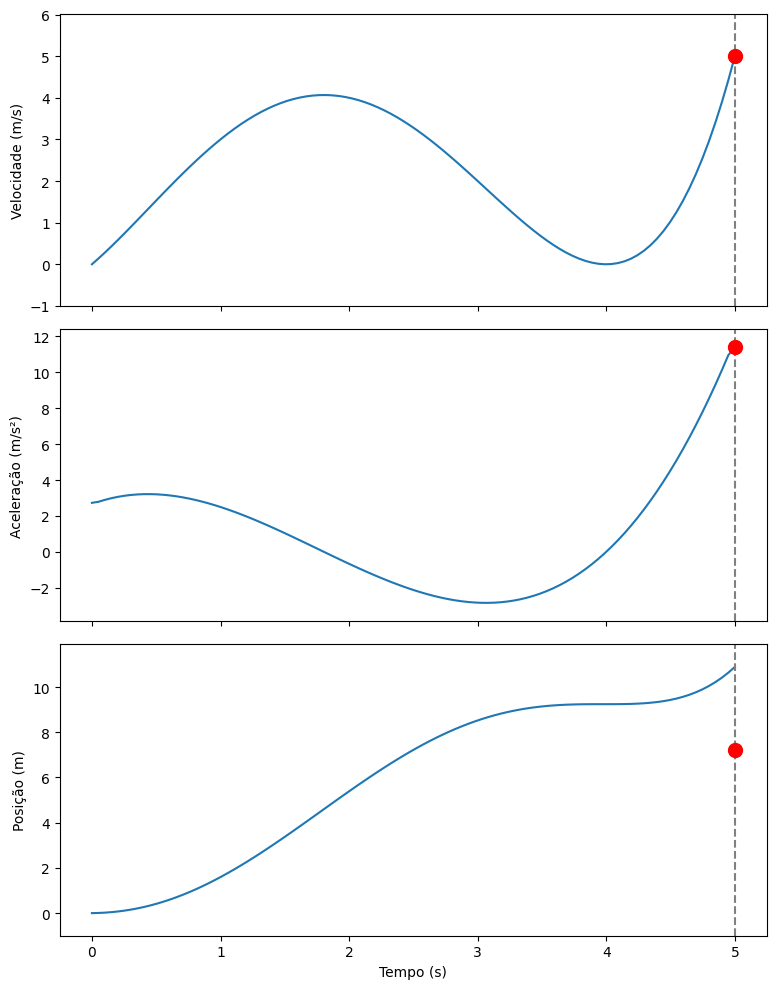

In [13]:
import numpy as np
import matplotlib.pyplot as plt

tempo = np.array([0, 1, 2, 3, 4])
velocidade = np.array([0, 3, 4, 2, 0])

polinomio = np.poly1d(np.polyfit(tempo, velocidade, len(tempo)-1))

t = np.linspace(0, 5, 100)

v = polinomio(t)
a = np.gradient(v, t)
x = np.cumsum(v) * np.mean(np.diff(t))

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 10))

axs[0].plot(t, v)
axs[0].axvline(x=5, color='gray', linestyle='--')
axs[0].plot(5, polinomio(5), 'ro', markersize=10)
axs[0].set_ylabel('Velocidade (m/s)')

axs[1].plot(t, a)
axs[1].axvline(x=5, color='gray', linestyle='--')
axs[1].plot(5, np.gradient(v, t)[t==5], 'ro', markersize=10)
axs[1].set_ylabel('Aceleração (m/s²)')

axs[2].plot(t, x)
axs[2].axvline(x=5, color='gray', linestyle='--')
axs[2].plot(5, np.trapz(v[:51], t[:51]), 'ro', markersize=10)
axs[2].set_ylabel('Posição (m)')
axs[2].set_xlabel('Tempo (s)')

axs[0].set_ylim([min(v)-1, max(v)+1])
axs[1].set_ylim([min(a)-1, max(a)+1])
axs[2].set_ylim([min(x)-1, max(x)+1])

plt.tight_layout()
plt.show()


Um engenheiro está projetando uma barragem de concreto com a forma de um trapézio retângulo. O projeto do perfil da barragem, olhando de lado, é dado pela função $f(x) = a + b\sin\left(\frac{\pi x}{H}\right)$, onde $x$ é a altura acima da base (em metros), $a$ é a altura mínima da barragem (em metros), e $b$ é a amplitude da variação do perfil (em metros). Por razões de segurança, o perfil da barragem varia sinusoidalmente de $a$ até $a + b$ ao longo da altura.

O engenheiro precisa calcular o volume de concreto necessário para construir a barragem. Ele sabe que o comprimento da barragem é de $L$ metros e que o perfil é o mesmo em todo o seu comprimento.

Ele decide então modelar o volume de concreto necessário como a integral da função $f(x)$, de $0$ até a altura máxima $H$, multiplicada pelo comprimento $L$.

Dadas as seguintes informações:

- $a = 10$ metros
- $b = 5$ metros
- $H = 20$ metros
- $L = 100$ metros

Calcule o volume de concreto necessário para a construção da barragem e trace o gráfico da função que descreve o perfil da barragem e sombreie a área sob a curva que representa o volume de concreto.



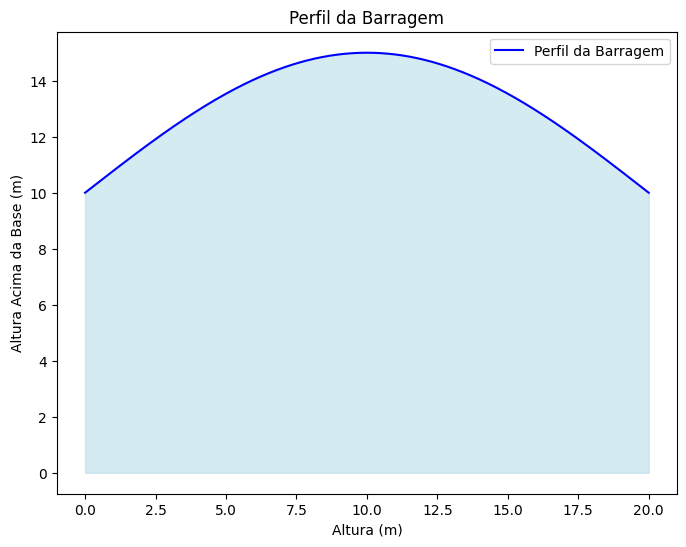

Volume de concreto necessário: 26366.19 metros cúbicos


In [15]:
import numpy as np
import matplotlib.pyplot as plt

a = 10  
b = 5   
H = 20  
L = 100 

def f(x):
    return a + b * np.sin((np.pi * x) / H)

x = np.linspace(0, H, 1000)
volume = np.trapz(f(x), x) * L

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, f(x), color='blue', label='Perfil da Barragem')
ax.fill_between(x, f(x), color='lightblue', alpha=0.5)
ax.set_xlabel('Altura (m)')
ax.set_ylabel('Altura Acima da Base (m)')
ax.set_title('Perfil da Barragem')
ax.legend()

plt.show()

print("Volume de concreto necessário: {:.2f} metros cúbicos".format(volume))
